In [786]:
import pandas as pd
import numpy as np
import os
import csv

In [6]:
os.chdir('/Users/shivangisinha/Downloads')

In [844]:
def import_data(filname):
    df = pd.read_csv(filname)
    return df

def normalize_df(df):
    for column in df:
        if (df[column].name == 'dummy'):
            continue
        if (df[column].dtype == np.int64 or df[column].dtype == np.float64):
            df[column] = (df[column]- min(df[column]))/(max(df[column] - min(df[column])))
    return df  


In [845]:
train= import_data("PA1_train.csv")

In [846]:
def preprocessing(df,normalize):
    # Part a)
    del df['id']
    # Part b)
    df['date'] = pd.to_datetime(df['date'])
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day
    #df['year'] = pd.to_datetime(df['year'])
    #df['month'] = pd.to_datetime(df['month'])
    #df['day'] = pd.to_datetime(df['day'])
    del df['date']
    # Changing data types 
    df['waterfront'] = df['waterfront'].astype('category')
    df['view'] = df['view'].astype('category')
    df['condition'] = df['condition'].astype('category')
    df['grade'] = df['grade'].astype('category')
    df['zipcode'] = df['zipcode'].astype('str')
    df['yr_built'] = pd.to_datetime(df['yr_built'])
    df['yr_renovated'] = pd.to_datetime(df['yr_renovated'])
    df['year'] = df['year'].astype('category')
    df['month'] = df['month'].astype('category')
    df['day'] = df['day'].astype('category')
    
    # Making tables for numerical features
    name = []
    mean = []
    sd =[]
    ranges = []
    for column in df:
        i=[]
        m=[]
        s=[]
        r=[]
        if (df[column].name == 'dummy'):
            continue
        if (df[column].dtype == np.int64 or df[column].dtype == np.float64):
            
            i = df[column].name
            m = df[column].mean()
            s = df[column].std()
            r = df[column].max() - df[column].min()
            name.append(i)   
            mean.append(m)
            sd.append(s)
            ranges.append(r)
    table = pd.DataFrame({'Name' : name,'Mean':mean,'Standard Deviation' :sd,'Range' : ranges})
    table.to_csv("table123.csv")
    print("Done")
    #print(table.head())
    # For categorical features 

    df2 = pd.DataFrame()    
    for column in df.select_dtypes(include=['category']):
        lab = len(df[column].unique())
        freq_v = list(((df[column].value_counts()/len(df[column]))*100)[0:lab])
        labels = df[column].unique()
        #df_v = df_v.sort_index()
        name = [df[column].name for i in range(0,lab)]
        df_v = pd.DataFrame({'Name': name,'Categories': labels,'Freq': freq_v})
        df2 = df2.append(df_v)
    df2.to_csv("cat123.csv")
    print("Done")
    # normalize
    if normalize==True:
        df = normalize_df(df)
        print("Done")
    return df
            
        
    

In [848]:
train = preprocessing(train,True)

Done
Done
Done


In [849]:
train.head()

,dummy,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,year,month,day
0,1,0.09375,0.275862,0.246849,0.005715,0.4,0,0,3,9,...,1970-01-01,98074,0.761782,0.394979,0.400000,0.011601,0.075345,2014,7,9
1,1,0.03125,0.275862,0.234244,0.002682,0.0,0,0,5,8,...,1970-01-01,98126,0.683127,0.112971,0.318584,0.004985,0.085635,2014,7,18
2,1,0.12500,0.172414,0.134454,0.001471,0.2,0,0,3,8,...,1970-01-01,98144,0.707093,0.174059,0.226549,0.003837,0.053026,2014,7,7
3,1,0.09375,0.172414,0.141807,0.005469,0.0,0,0,4,8,...,1970-01-01,98059,0.515522,0.300418,0.212389,0.011556,0.043772,2015,4,28
4,1,0.15625,0.241379,0.363445,0.006426,0.0,0,2,5,9,...,1970-01-01,98008,0.690043,0.335565,0.361062,0.011188,0.118243,2014,9,4


In [386]:
train =normalize(train)

In [387]:
train.head()

,dummy,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,1,2014-07-09,0.09375,0.275862,0.246849,0.005715,0.4,0,0,3,...,0.276796,0.000000,1970-01-01 00:00:00.000001989,1970-01-01,98074,0.761782,0.394979,0.400000,0.011601,0.075345
1,1,2014-07-18,0.03125,0.275862,0.234244,0.002682,0.0,0,0,5,...,0.109541,0.477941,1970-01-01 00:00:00.000001926,1970-01-01,98126,0.683127,0.112971,0.318584,0.004985,0.085635
2,1,2014-07-07,0.12500,0.172414,0.134454,0.001471,0.2,0,0,3,...,0.150766,0.000000,1970-01-01 00:00:00.000001902,1970-01-01,98144,0.707093,0.174059,0.226549,0.003837,0.053026
3,1,2015-04-28,0.09375,0.172414,0.141807,0.005469,0.0,0,0,4,...,0.159011,0.000000,1970-01-01 00:00:00.000001969,1970-01-01,98059,0.515522,0.300418,0.212389,0.011556,0.043772
4,1,2014-09-04,0.15625,0.241379,0.363445,0.006426,0.0,0,2,5,...,0.243816,0.511029,1970-01-01 00:00:00.000001962,1970-01-01,98008,0.690043,0.335565,0.361062,0.011188,0.118243


In [430]:
def one_hot(a, num_classes):
    return np.squeeze(np.eye(num_classes)[(a-min(a)).reshape(-1)])

#def make_dummies(df):
    #b = np.empty((10000,22))
    #for column in df.select_dtypes(include=['category']):
            #arr = np.array( df[column])
            #classes =len(np.unique(arr))
            #a = one_hot(arr,classes)
            #np.hstack((b,a))
    #return b
            
        

In [441]:
#Making hot encoded array for each categorical variables 
view = np.array(train['view'])
k = len(np.unique(view))
encod = one_hot(view,k)

waterfront = np.array(train['waterfront'])
k = len(np.unique(waterfront))
encod2 = one_hot(waterfront,k)

grade = np.array(train['grade'])
k = len(np.unique(grade))
encod3 = one_hot(grade,k)

test_classes = train['zipcode'].unique()
d = dict(zip(test_classes, range(0,len(train['zipcode'].unique()))))
train['zipcode'] = train['zipcode'].map(d, na_action='ignore')
zipcode = np.array(train['zipcode'])
k = len(np.unique(zipcode))
encod4= one_hot(zipcode,k)

In [442]:
#Combined array for categorical variables
cat_features = np.hstack((encod,encod2,encod3,encod4))

In [439]:
#To print entire array 
#with np.printoptions(threshold=np.inf):
     #print(encod3)

In [443]:
cat_features.size

870000

In [446]:
## For checking purposes (Not using date time for implementation)
del train['date']
del train['view']
del train['waterfront']
del train['zipcode']
del train['grade']
del train['yr_built']
del train['yr_renovated']

KeyError: 'date'

In [468]:
#Separating target from features
tar = train.loc[:,['price']]

In [469]:
#Separating target from features
feat = train.iloc[:,0:13]


In [475]:
#Converting dataframe to matrix
X = feat.as_matrix()
#adding encoded features
X = np.hstack((X,cat_features))
Y = tar.as_matrix()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [546]:
#cost function
def L2cost_function(x,y,theta,lamda):
    n=y.size
    J=0
    h = np.dot(x,theta)
    
    L2_cost = (lamda)*np.sum(np.dot(theta[1:].T,theta[1:]))
    J= (1/2)*np.dot(np.transpose(h-y),(h-y)) + L2_cost
    return J
    
    

In [547]:
#Gradient calculation
def gradient(x,y,theta,lamda):
    n = y.size
    h = np.dot(x,theta)
    theta0 = theta[0,0]
    theta[0,0] = 0
    grad = x.T.dot(h-y) + lamda*theta
    theta[0,0] = theta0
    return grad

In [580]:
def optimize(x,y,lamda,alpha,epsilon):
    theta = np.zeros((x.shape[1],1))
    grad = gradient(x,y,theta,lamda)
    #print(grad)
    n_iter =0
    J = []
    while (np.linalg.norm(grad) > epsilon):
        cost = L2cost_function(x,y,theta,lamda)
        print(cost[0])
        J.append(cost[0])
        grad = gradient(x,y,theta,lamda)
        
        
        n_iter += 1
        theta = theta-(alpha*grad)
        print(theta)
        if cost > 10e100:
            print("explosion")
            break
        if n_iter>1000:
            break
    return J,theta,n_iter               
                     

In [581]:
def predict(X,theta):
    return np.dot(X,theta)

In [601]:
cost,w,n = optimize(X,Y,0,0.001,0.5)

[36.26132767525535]
[[0.6705782633666321]
 [0.05449263006756754]
 [0.1787893939077746]
 [0.15529604691648952]
 [0.007080578908626471]
 [0.16538707881903625]
 [2.303669977820208]
 [0.14352102952142545]
 [0.09556059779708778]
 [0.4716374475342614]
 [0.1703329958922294]
 [0.21997672212381508]
 [0.010765643361741248]
 [0.5500445014688633]
 [0.01706368977673325]
 [0.044637220329024646]
 [0.03191528642773207]
 [0.02691756536427731]
 [0.6561398171269137]
 [0.014438446239717975]
 [0.000195358401880141]
 [0.0026819822267920078]
 [0.03006214923619271]
 [0.19449791451233744]
 [0.19228194917743863]
 [0.11635926468860168]
 [0.07760059503525264]
 [0.04141182917156288]
 [0.012705199764982375]
 [0.002782021151586369]
 [0.018986598854289077]
 [0.008316595769682729]
 [0.011848394242068159]
 [0.013915181110458282]
 [0.00791854876615746]
 [0.01136429891304348]
 [0.00496942259106933]
 [0.010928312426556992]
 [0.015117680669800236]
 [0.0011842141598119858]
 [0.008929429347826083]
 [0.006742272914218566]
 [0

[4.867039800246199e+27]
[[9701432082906.316]
 [721679010999.3895]
 [2147470463344.4695]
 [1733242123948.9507]
 [84515999805.01434]
 [1879817840075.6997]
 [33984432969569.42]
 [1604484376493.122]
 [1058232596899.7947]
 [6322749114699.092]
 [2425150483824.399]
 [2615651456083.165]
 [134024743893.50781]
 [8789883333944.039]
 [152236631275.05884]
 [400371761223.384]
 [233224880434.54468]
 [125715476029.30737]
 [9638366693946.28]
 [63065388960.047874]
 [9579100532.608078]
 [97721555478.96538]
 [912419085414.4446]
 [4112214250992.165]
 [2731575085081.404]
 [1102758199571.544]
 [504474466960.9856]
 [190779933769.58032]
 [35561740788.347725]
 [4348664316.264432]
 [192266112035.0166]
 [169015506276.4316]
 [153125592164.31708]
 [224835002564.84897]
 [112563281972.97029]
 [246526459908.98264]
 [113669993350.5975]
 [207190774634.85007]
 [250507490054.73883]
 [48277809496.82061]
 [253439184150.29825]
 [120775628180.31056]
 [164783253326.93994]
 [186074489366.9229]
 [139956505979.38657]
 [2494458886

[[5.8536405692692e+21]
 [4.3544597340619774e+20]
 [1.2957386206600883e+21]
 [1.0458019317563984e+21]
 [5.099518101894403e+19]
 [1.1342426435036386e+21]
 [2.050549381310546e+22]
 [9.68112208458365e+20]
 [6.385153457755056e+20]
 [3.815014155726881e+21]
 [1.463284918904671e+21]
 [1.578229208589232e+21]
 [8.086771843953243e+19]
 [5.303631179708488e+21]
 [9.185638917471427e+19]
 [2.4157592036469627e+20]
 [1.4072299947113084e+20]
 [7.585408055017021e+19]
 [5.815588236770457e+21]
 [3.805233249874063e+19]
 [5.779828278504787e+18]
 [5.8963136241664885e+19]
 [5.5053453231568034e+20]
 [2.481223799075834e+21]
 [1.6481750940813733e+21]
 [6.653811602174847e+20]
 [3.043893087868711e+20]
 [1.151126092076332e+20]
 [2.1457208256777634e+19]
 [2.6238928073866363e+18]
 [1.1600933799091326e+20]
 [1.019804103065541e+20]
 [9.239276952374932e+19]
 [1.3566072319610064e+20]
 [6.791832260811591e+19]
 [1.4874889344071713e+20]
 [6.858608903301724e+19]
 [1.250145662637598e+20]
 [1.5115096350327433e+20]
 [2.912981731

[[3.5319639019657203e+30]
 [2.6273896409034597e+29]
 [7.81821497305498e+29]
 [6.3101494324082594e+29]
 [3.0769422276913863e+28]
 [6.843782130998093e+29]
 [1.2372584733010185e+31]
 [5.841385942413834e+29]
 [3.8526676269974404e+29]
 [2.3018994972555594e+30]
 [8.829154183116057e+29]
 [9.522703910160009e+29]
 [4.8793884589059195e+28]
 [3.200099776267754e+30]
 [5.542421795305212e+28]
 [1.4576184174881323e+29]
 [8.490930531637081e+28]
 [4.576876067972316e+28]
 [3.50900392292691e+30]
 [2.2959979038809964e+28]
 [3.487427114403114e+27]
 [3.557711927950608e+28]
 [3.321809858180801e+29]
 [1.497118380831527e+30]
 [9.944742707598618e+29]
 [4.0147703145183236e+29]
 [1.83662122410386e+29]
 [6.945653317303087e+28]
 [1.2946829260027592e+28]
 [1.5832018670517816e+27]
 [6.999760050624333e+28]
 [6.153283988794152e+28]
 [5.5747858601653115e+28]
 [8.18548340256239e+28]
 [4.098049084074104e+28]
 [8.975196134318623e+28]
 [4.13834070908569e+28]
 [7.54311663038485e+28]
 [9.120132002015807e+28]
 [1.7576320583576

[[-3.3400580251793207e+41]
 [-2.4846329404693344e+40]
 [-7.393419748371762e+40]
 [-5.96729350491544e+40]
 [-2.909759517897109e+39]
 [-6.471931781776431e+40]
 [-1.1700332188192048e+42]
 [-5.52399983031267e+40]
 [-3.6433366203826644e+40]
 [-2.176827992122341e+41]
 [-8.349430544420291e+40]
 [-9.005296911113524e+40]
 [-4.614271558966289e+39]
 [-3.0262254189939415e+41]
 [-5.2412796138814044e+39]
 [-1.3784201164317755e+40]
 [-8.029583951197975e+39]
 [-4.328195889140901e+39]
 [-3.3183455546175886e+41]
 [-2.1712470561730674e+39]
 [-3.2979411013253152e+38]
 [-3.364407056825849e+39]
 [-3.1413225001426645e+40]
 [-1.4157738870878055e+41]
 [-9.404404634592088e+40]
 [-3.796631613589119e+40]
 [-1.7368301684421618e+40]
 [-6.568267894714375e+39]
 [-1.2243375688668439e+39]
 [-1.497180109508523e+38]
 [-6.619434790487371e+39]
 [-5.818951194982737e+39]
 [-5.27188520826566e+39]
 [-7.740732999418404e+39]
 [-3.875385510939835e+39]
 [-8.487537446038226e+39]
 [-3.9134879290853203e+39]
 [-7.133268610746134e+39]


[[-2.0153209333242287e+50]
 [-1.4991753852198284e+49]
 [-4.461034351924583e+49]
 [-3.600539698737794e+49]
 [-1.7556878422920882e+48]
 [-3.905027846981859e+49]
 [-7.059734953091101e+50]
 [-3.3330655964010955e+49]
 [-2.198312874462638e+49]
 [-1.3134523375637475e+50]
 [-5.03787120782237e+49]
 [-5.433607212495323e+49]
 [-2.784154644836821e+48]
 [-1.8259609233971136e+50]
 [-3.162478149670373e+48]
 [-8.317097770812073e+48]
 [-4.844882484299012e+48]
 [-2.611542587930123e+48]
 [-2.002220084145147e+50]
 [-1.3100849179077625e+48]
 [-1.989908465142448e+47]
 [-2.0300126281431577e+48]
 [-1.8954080872652053e+49]
 [-8.54248258560926e+49]
 [-5.674420439006409e+49]
 [-2.290807857020971e+49]
 [-1.0479668825222373e+49]
 [-3.9631550362627964e+48]
 [-7.387396007469617e+47]
 [-9.033670651536686e+46]
 [-3.9940280676194915e+48]
 [-3.511033061352639e+48]
 [-3.1809449231738386e+48]
 [-4.6705958804904544e+48]
 [-2.3383263063159474e+48]
 [-5.1212020145835154e+48]
 [-2.3613165059831366e+48]
 [-4.304064613814478e+4

In [515]:
# To check the code
x = np.array([[1, 1, 2, 3], [1, 4, 5, 6],[1, 7, 8, 9],[1, 10, 11, 12]])
y = np.array([[8],[17],[26],[35]])
optimize(x,y,0,0.001,0.5)

([array([[281.75]]),
  array([[34.454663]]),
  array([[4.42122888]]),
  array([[0.77270602]]),
  array([[0.32844792]]),
  array([[0.27333068]]),
  array([[0.26547761]]),
  array([[0.26337019]]),
  array([[0.26196627]]),
  array([[0.26065349]]),
  array([[0.25935745]]),
  array([[0.25806909]]),
  array([[0.25678727]]),
  array([[0.25551185]]),
  array([[0.25424276]]),
  array([[0.25297997]]),
  array([[0.25172346]]),
  array([[0.25047318]]),
  array([[0.24922912]]),
  array([[0.24799124]]),
  array([[0.2467595]]),
  array([[0.24553388]]),
  array([[0.24431435]]),
  array([[0.24310088]]),
  array([[0.24189343]]),
  array([[0.24069198]]),
  array([[0.2394965]]),
  array([[0.23830696]]),
  array([[0.23712332]]),
  array([[0.23594556]]),
  array([[0.23477366]]),
  array([[0.23360757]]),
  array([[0.23244728]]),
  array([[0.23129274]]),
  array([[0.23014395]]),
  array([[0.22900086]]),
  array([[0.22786344]]),
  array([[0.22673168]]),
  array([[0.22560553]]),
  array([[0.22448498]]),
  array

In [602]:
n

24

In [553]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=1, solver='sag', max_iter=1500)

In [554]:
clf.fit(X,Y)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=1500,
   normalize=False, random_state=None, solver='sag', tol=0.001)

In [555]:
def closed_form_solution(X,y):
    '''Closed form solution for linear regression'''
    return np.linalg.inv(X.T @ X) @ X.T @ y

In [556]:
W = closed_form_solution(X,Y)

TypeError: Object arrays are not currently supported

In [563]:
import matplotlib.pyplot as plt

ValueError: x and y can be no greater than 2-D, but have shapes (1001, 1, 1) and (1001,)

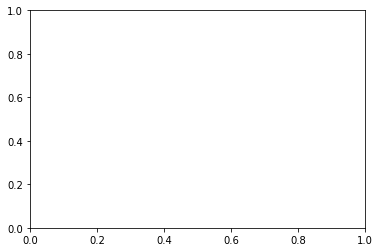

In [565]:
plt.plot(cost,range(0,n))

In [566]:
type(cost)

list

In [587]:
type(cost[0])

numpy.ndarray

In [603]:
cost =np.concatenate(cost).ravel().tolist()

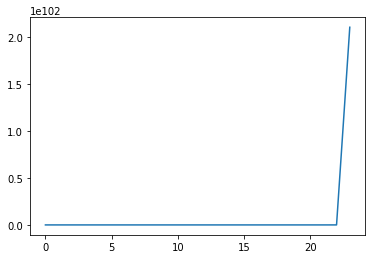

In [605]:
plt.plot(np.arange(0,n),cost)

In [598]:
np.arange(0,n)

array([   0,    1,    2, ...,  998,  999, 1000])

In [596]:
a


range(0, 1001)